# CERTAMEN III - FASE II


Instrucciones:

*   Por favor trabaje individualmente. Es posible utilizar apuntes, libros, papers, ejemplos y cualquier otro material que desee de internet, pero debe ser usted quien desarrolle los ejercicios y comente los resultados en el notebook que entregará. Compórtese como si estuviese haciendo un certámen tradicional con acceso a apuntes.

*   Puede utilizar Python o R. En ambos casos, no puede usar funciones estadísticas específicas, excepto aquellas correspondientes al cálculo de medidas de tendencia ó dispersión (media, desviación estándar, etc) y aquellas correspondientes al cálculo de probabilidades y percentiles sobre las distribuciones revisadas en clases (pnorm, qnorm, pt, qt), etc.

*   Sus respuestas deben ser entregadas en forma de Jupyter notebook, enviándolas a mi correo electrónico institucional con copia a ambos ayudantes. 

*   Por favor, no use la modalidad de entregar su trabajo compartiendo el notebook desde plataformas como GitHub ó Colab. Si las utiliza para desarrollar, trabaje siempre sobre repositorios *privados*. 

*   **Además del notebook, debe entregar un video explicando lo que hizo, paso a paso, como en los ejemplos entregados hace algunas semanas. El video puede ser adjuntado al correo que me manden, o compartido desde una plataforma como GitHub, Youtube ó Google Drive, siempre y cuando éste sea *privado* y se comparta sólo conmigo y los ayudantes.**










## Pregunta 1 (35%)

El *período serial* (a veces llamado *tiempo de generación*), es uno de los parámetros epidemiológicos fundamentales para entender y proyectar la dinámica de propagación del COVID-19. Este se define como el tiempo que pasa en una cadena de transmisión/contagio desde que el caso primario (infector) desarrolla síntomas hasta que el caso secundario (infectado) los muestra. 

A continuación se ponen a su disposición datos reales correspondientes a 468 pares confirmados de infector-infectado, todos verificados en provincias de China entre el 21 de Enero y el 8 de Febrero de 2020. A partir de esta muestra es posible estimar la distribución del período serial y sus estadísticas más relevantes. Como sugiere el histograma y confirman estudios recientes, una distribución normal parece más apropiada para caracterizar los datos, que otras distribuciones comúnmente usadas en epidemiología (e.g. Gamma o Weibull).


### Recolección y Pre-procesamiento de Datos

El dataset se denomina "COVID19-SERIAL2.csv" y puede descargarse usando el comando wget en cualquier ambiente Linux o manualmente en la siguiente URL:

> http://jricardon.github.io/spambase/COVID19-SERIAL2.csv

Si trabaja en Google Colab puede descargar el dataset a la máquina virtual mediante el siguiente código:



In [0]:
!wget --no-check-certificate http://jricardon.github.io/spambase/COVID19-SERIAL2.csv

URL transformed to HTTPS due to an HSTS policy
--2020-03-20 21:22:18--  https://jricardon.github.io/spambase/COVID19-SERIAL2.csv
Resolving jricardon.github.io (jricardon.github.io)... 185.199.109.153, 185.199.111.153, 185.199.110.153, ...
Connecting to jricardon.github.io (jricardon.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70246 (69K) [text/csv]
Saving to: ‘COVID19-SERIAL2.csv.18’

COVID19-SERIAL2.csv 100%[===================>]  68.60K  --.-KB/s    in 0.03s   

2020-03-20 21:22:18 (2.48 MB/s) - ‘COVID19-SERIAL2.csv.18’ saved [70246/70246]



Se trata de un simple archivo CSV donde cada fila corresponde a un par infector-infectado. Puede obtener a la fecha en que el caso primario manifestó los síntomas accediendo a la columna 'Index - symptom onset date'. Puede obtener a la fecha en que el caso secundario manifestó los síntomas accediendo a la columna 'Seconday - symptom onset date'. Las edades de cada caso se pueden obtener de las columnas 'Index - Age' y 'Seconday - Age' respectivamente. 



Index(['Event index', 'Index ID', 'Secondary ID', 'City', 'Province',
       'Index - infection location', 'Index - symptom onset date',
       'Index - Age', 'Index - Sex', 'Secondary - infection location',
       'Seconday - symptom onset date', 'Seconday - Age', 'Seconday-Sex',
       'Contact type', 'URL', 'Data source'],
      dtype='object')


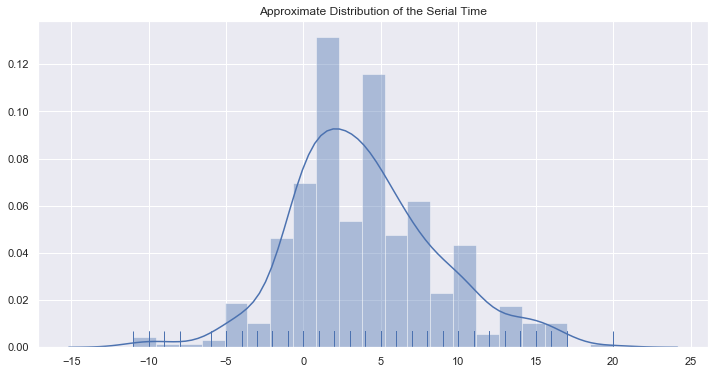

ValueError: cannot convert float NaN to integer

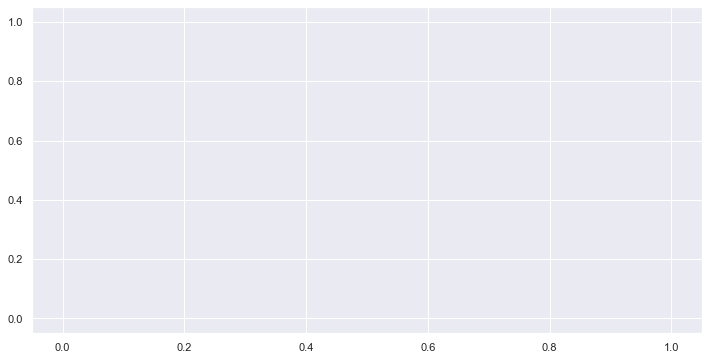

In [38]:

import pandas as pd
data_serial = pd.read_csv("COVID19-SERIAL2.csv",sep=';')
#print(data_serial.head(5))
print(data_serial.columns)
date_infector = data_serial['Index - symptom onset date']
date_infected = data_serial['Seconday - symptom onset date']

serial_period = date_infected - date_infector

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(serial_period.values,ax=ax,rug=True)
ax.set_title("Approximate Distribution of the Serial Time")
plt.show()

fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(data_serial['Seconday - Age'].values,ax=ax,rug=True)
ax.set_title("Approximate Distribution of the Seconday Age")
plt.show()

sampleA = data_serial.loc[data_serial['Seconday - Age'] < 60]
sampleB = data_serial.loc[data_serial['Seconday - Age'] >= 60]
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(sampleA['Index - symptom onset date'].values-sampleA['Seconday - symptom onset date'].values,ax=ax,rug=True)
sns.distplot(sampleB['Index - symptom onset date'].values-sampleB['Seconday - symptom onset date'].values,ax=ax,rug=True)
ax.set_title("Distribution of the Serial Time x Age Range")
plt.show()

Los valores negativos sugieren que puede haber contagio antes de que el paciente primario desarrolle síntomas.

### **Actividades:**

1.   Construya un intervalo de confianza para el valor medio del período de generación (serial period) adoptando un nivel de significación del 10%.

2.   ¿Aumenta o disminuye el largo de intervalo si se aumenta el nivel de confianza? Verifique su respuesta experimentalmente y explique porqué sucede lo que observa.

3.   Separe la muestra disponible en dos partes: la primera con los casos en el caso secundario (infectado) tenía más de 60 años y la segunda con el resto de los casos. Adoptando un nivel de significación del 10%, construya sendos intervalos de confianza que comparen el valor del parámetro en las dos poblaciones. ¿Observa diferencias estadísticamente significativas entre las dos medias? ¿Cambian sus conclusiones si aumenta el nivel de confianza? ¿Tienen los intervalos longitudes diferentes aún si se trabaja con el mismo nivel de significación? ¿Se puede concluir de este análisis que un paciente primario menor a 60 años contagiará antes que un paciente primario de más de 60 años? Justifique seria y claramente todas sus respuestas.




## Respuesta 1

Se utilizó todo el dataset como espacio muestral suponiendo que los 468 casos son solamente una muestra de todos los casos (ya sea en China o en el mundo).  \
Se creó un intervalo de confianza con la fórmula de intervalo de confianza para media con varianza desconocida con significación 0.1.

\begin{align}
IC = \bar{X} \pm T_{\alpha/2,n-1}\frac{S_x}{\sqrt{n}}
\end{align}

In [235]:
from scipy.stats import norm, t
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

data_serial['serial_period']=serial_period

def Intervalo_media(n,significacion,media,std):
    t_std = t.ppf(1-significacion,df=n-1)
    intervalo_inf = media - t_std*std/np.sqrt(n)
    intervalo_sup = media + t_std*std/np.sqrt(n)
    return intervalo_inf,intervalo_sup
    
n=468
significacion = 0.1
media_muestral = data_serial['serial_period'].mean()
std_muestral = data_serial["serial_period"].std()

print("El intervalo de confianza es:")
print(Intervalo_media(n,significacion,media_muestral,std_muestral))

El intervalo de confianza es:
(3.675712236563393, 4.238817677966521)


## Respuesta 2

3.675712236563393 4.238817677966521
3.59568987789678 4.318840036633135
3.4451392584568508 4.469390656073064
3.2754626971743255 4.639067217355589


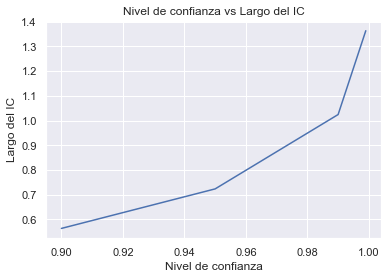

In [259]:
l = []
intervalo_inf,intervalo_sup = Intervalo_media(n,0.1,media_muestral,std_muestral)
l.append(intervalo_sup - intervalo_inf)
print(intervalo_inf,intervalo_sup)

intervalo_inf,intervalo_sup = Intervalo_media(n,0.05,media_muestral,std_muestral)
l.append(intervalo_sup - intervalo_inf)
print(intervalo_inf,intervalo_sup)

intervalo_inf,intervalo_sup = Intervalo_media(n,0.01,media_muestral,std_muestral)
l.append(intervalo_sup - intervalo_inf)
print(intervalo_inf,intervalo_sup)

intervalo_inf,intervalo_sup = Intervalo_media(n,0.001,media_muestral,std_muestral)
l.append(intervalo_sup - intervalo_inf)
print(intervalo_inf,intervalo_sup)

plt.plot([0.9,0.95,0.99,0.999],l)
plt.xlabel("Nivel de confianza")
plt.ylabel("Largo del IC")
plt.title("Nivel de confianza vs Largo del IC")
plt.show()

Como se puede observar, a medida que el nivel de confianza aumenta, también aumenta el largo del intervalo de confianza. Lo cual tiene sentido, ya que si aumentas el intervalo, las posibilidades de equivocarse disminuyen. Por lo que si quieres aumentar la posibilidad, hay que agrandar el intervalo.

## Respuesta 3

In [48]:
data1 = data_serial.loc[data_serial['Seconday - Age'] > 60]
data2 = data_serial.loc[data_serial['Seconday - Age'] <= 60]

media1 = data1['serial_period'].mean()
std1 = data1['serial_period'].std()
n1 = data1.size / 17

media2 = data2['serial_period'].mean()
std2 = data2['serial_period'].std()
n2 = data2.size / 17

print(Intervalo_media(n1,0.1,media1,std1))
print(Intervalo_media(n2,0.1,media2,std2))

(4.087663404795941, 5.265277771674648)
(3.3979290461743576, 4.051509156072834)


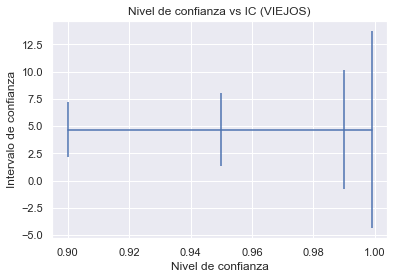

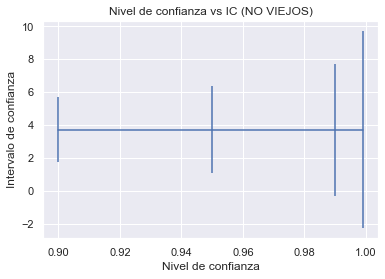

In [273]:
l1 = []
err1 = []
intervalo_inf,intervalo_sup = Intervalo_media(n1,0.1,media1,std1)
err1.append((intervalo_sup - intervalo_inf)/2)
l1.append((intervalo_sup - intervalo_inf)/2 + intervalo_inf)

intervalo_inf,intervalo_sup = Intervalo_media(n1,0.05,media1,std1)
err1.append((intervalo_sup - intervalo_inf)/2)
l1.append((intervalo_sup - intervalo_inf)/2 + intervalo_inf)

intervalo_inf,intervalo_sup = Intervalo_media(n1,0.01,media1,std1)
err1.append((intervalo_sup - intervalo_inf)/2)
l1.append((intervalo_sup - intervalo_inf)/2 + intervalo_inf)

intervalo_inf,intervalo_sup = Intervalo_media(n1,0.001,media1,std1)
err1.append((intervalo_sup - intervalo_inf)/2)
l1.append((intervalo_sup - intervalo_inf)/2 + intervalo_inf)

plt.errorbar([0.9,0.95,0.99,0.999],l1,yerr = err1)

plt.xlabel("Nivel de confianza")
plt.ylabel("Intervalo de confianza")
plt.title("Nivel de confianza vs IC (VIEJOS)")
plt.show()


l2 = []
err2 = []
intervalo_inf,intervalo_sup = Intervalo_media(n2,0.1,media2,std2)
err2.append((intervalo_sup - intervalo_inf)/2)
l2.append((intervalo_sup - intervalo_inf)/2 + intervalo_inf)

intervalo_inf,intervalo_sup = Intervalo_media(n2,0.05,media2,std2)
err2.append((intervalo_sup - intervalo_inf)/2)
l2.append((intervalo_sup - intervalo_inf)/2 + intervalo_inf)

intervalo_inf,intervalo_sup = Intervalo_media(n2,0.01,media2,std2)
err2.append((intervalo_sup - intervalo_inf)/2)
l2.append((intervalo_sup - intervalo_inf)/2 + intervalo_inf)

intervalo_inf,intervalo_sup = Intervalo_media(n2,0.001,media2,std2)
err2.append((intervalo_sup - intervalo_inf)/2)
l2.append((intervalo_sup - intervalo_inf)/2 + intervalo_inf)

plt.errorbar([0.9,0.95,0.99,0.999],l2,yerr = err2)
plt.xlabel("Nivel de confianza")
plt.ylabel("Intervalo de confianza")
plt.title("Nivel de confianza vs IC (NO VIEJOS)")
plt.show()




Los dos intervalos referentes a las medias no se superponen, por lo que se puede evidenciar una diferencia significativa entre ambas.  \
\
Al aumentar el nivel de confianza se observa una similitud en su comportamiento, sin embargo es evidente que aumenta el intervalo de confianza y también se logra evidenciar que ahora los intervalos se superponen de manera considerable.  \
\
Se puede evidenciar que el intervalo correspondiente a los mayores de 60 años es mucho mayor a pesar de tener el mismo nivel de confianza que el de los menores a 60 años.  \
\
No se puede concluir nada entre los pacientes primarios, ya que los grupos se hicieron entre mayores de 60 años secundarios y otros. Sin embargo se puede concluir que los mayores de 60 años demoran más tiempo en presentar los síntomas que los menores de 60 años.

## Pregunta 2 (35%)

Durante las últimas semanas, varias investigaciones han presentado evidencia que sugiere que el COVID-19 tendría tasas de contagio y mortalidad mucho mayores en grupos de personas de edad avanzada. Esta hipótesis se ha propuesto como uno de los factores que explicaría el mayor número de casos y decesos en países con un gran porcentaje de población anciana como Italia (los jóvenes se enfermarían menos y/o al presentar síntomas más leves, no serían identificados).

A continuación se ponen a su disposición datos reales que le permitirán esta hipótesis, contrastando antecedentes demográficos de diferentes países con las cifras de contagio hasta ahora disponibles. 


### Recolección y Pre-procesamiento de Datos

Necesitará descargar 4 dataset distintos. 

- **oxford_data_COVID_total.csv**: contiene el número total de contagios confirmados en diferentes países, durante los últimos 3 meses.
- **oxford_data_COVID_deaths.csv**: contiene el número oficial de muertes por COVID-19 informadas por diferentes países, durante los últimos 3 meses.
- **data-age3.csv**: contiene la edad promedio de la población de diferentes países, de acuerdo a los registros de la OMS. 
- **age_over60c.csv**: contiene el porcentaje de la población con más de 65 años en diferentes países, de acuerdo a los registros de la OMS. 

Los 4 dataset se pueden descargar usando el comando wget en cualquier ambiente Linux o explorando manualmente las siguientes URL:

> http://jricardon.github.io/spambase/data-age3.csv
> http://jricardon.github.io/spambase/oxford_data_COVID_total.csv
> http://jricardon.github.io/spambase/oxford_data_COVID_deaths.csv
> http://jricardon.github.io/spambase/age_over60c.csv


Si trabaja en Google Colab puede descargar el dataset a la máquina virtual mediante el siguiente código:



In [1]:
!wget --no-check-certificate http://jricardon.github.io/spambase/data-age3.csv
!wget --no-check-certificate http://jricardon.github.io/spambase/oxford_data_COVID_total.csv
!wget --no-check-certificate http://jricardon.github.io/spambase/oxford_data_COVID_deaths.csv
!wget --no-check-certificate http://jricardon.github.io/spambase/age_over60c.csv


--2020-03-22 21:44:20--  http://jricardon.github.io/spambase/data-age3.csv
Resolving jricardon.github.io (jricardon.github.io)... 185.199.108.153, 185.199.111.153, 185.199.110.153, ...
Connecting to jricardon.github.io (jricardon.github.io)|185.199.108.153|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://jricardon.github.io/spambase/data-age3.csv [following]
--2020-03-22 21:44:20--  https://jricardon.github.io/spambase/data-age3.csv
Connecting to jricardon.github.io (jricardon.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3521 (3.4K) [text/csv]
Saving to: ‘data-age3.csv’

data-age3.csv       100%[===================>]   3.44K  --.-KB/s    in 0s      

2020-03-22 21:44:20 (100 MB/s) - ‘data-age3.csv’ saved [3521/3521]

URL transformed to HTTPS due to an HSTS policy
--2020-03-22 21:44:22--  https://jricardon.github.io/spambase/oxford_data_COVID_total.csv
Resolving jricardon.github.io (

Una vez descargados los archivos de datos, utilizemos la librería pandas para integrar en un sólo dataframe registros que por ahora se encuentran en diferentes bases de datos. Utilizaremos también algunos criterios simples para filtrar instancias que podrían corresponder a errores, valores extremos, o países que se encuentran en estadios muy inciales de la pandemia.

*   Se consideran sólo los países donde el primer caso confirmado se haya registrado hace más de 20 días.
*   Sólo se consideran tasas válidas de mortalidad aquellas menores a 0.5
*   Sólo se considerar los países cuya edad media sea mayor a 20 años.

Como se integraron bases de datos diferentes, se utilizó un pequeño diccionario para manejar variantes del nombre de un país (e.g "United States" = "United States of America").

**Una vez concluido el proceso de pre-procesamiento, obtendremos un dataframe denominado mortality_df, indexado por nombre de cada país, y contenente los siguientes atributos (columnas)**

*   ncases: número total de casos confirmados al 19 de Marzo
*   log-ncases: logaritmo del número de casos totales a 19 de Marzo
*   ndeaths: total de muertes informadas al 19 de Marzo
*   mortality: cuociente entre ndeaths y ncases
*   age: promedio de la población (al año 2018)
*   overp: porcentaje de la población mayor de 65 años (al año 2018)



In [6]:
import pandas as pd
data_age = pd.read_csv("data-age3.csv",index_col=0)
data_over = pd.read_csv("age_over60c.csv",index_col=0)
data_cases = pd.read_csv("oxford_data_COVID_total.csv")
data_deaths = pd.read_csv("oxford_data_COVID_deaths.csv")


data_age = data_age.drop([' Poor'], axis=1)
print(data_age.head(5))
print(data_age.columns)


print(data_cases.head(5))
print(data_cases.columns)

print(data_deaths.head(5))
print(data_deaths.columns)

print(data_over.head(5))
print(data_over.columns)


                      Age
Country                  
Afghanistan          16.5
Albania              32.9
Algeria              26.9
Angola               16.3
Antigua and Barbuda  30.5
Index([' Age'], dtype='object')
         date  World  Afghanistan  Albania  Algeria  Andorra  \
0  2019-12-31     27          0.0      NaN      0.0      NaN   
1  2020-01-01     27          0.0      NaN      0.0      NaN   
2  2020-01-02     27          0.0      NaN      0.0      NaN   
3  2020-01-03     44          0.0      NaN      0.0      NaN   
4  2020-01-04     44          0.0      NaN      0.0      NaN   

   Antigua and Barbuda  Argentina  Armenia  Australia  ...  Ukraine  \
0                  NaN        NaN      0.0          0  ...      NaN   
1                  NaN        NaN      0.0          0  ...      NaN   
2                  NaN        NaN      0.0          0  ...      NaN   
3                  NaN        NaN      0.0          0  ...      NaN   
4                  NaN        NaN      0.0    

In [7]:
import math
import numpy as np

mortality_df = pd.DataFrame(columns=['country', 'cases', 'log-cases', 'deaths', 'mortality', 'age', 'overp'])

dic_countries = {}
dic_countries['Bolivia'] = 'Bolivia (Plurinational State of)'
dic_countries['Brunei']  = 'Brunei Darussalam'
dic_countries['Czech Republic']  = 'Czechia'
dic_countries['Democratic Republic of Congo']  = 'Congo'
dic_countries['Iran']  = 'Iran (Islamic Republic of)'
dic_countries['Russia']  = 'Russian Federation'
dic_countries['South Korea']  = 'Republic of Korea'
dic_countries['Tanzania']  = 'United Republic of Tanzania'
dic_countries['United Kingdom']  = 'United Kingdom of Great Britain and Northern Ireland'
dic_countries['United States']  = 'United States of America'
dic_countries['Venezuela']  = 'Venezuela (Bolivarian Republic of)'
dic_countries['Vietnam']  = 'Viet Nam'


for country in data_cases.columns[2:]:

    cases_history = data_cases[country].values
    first_idx = np.argmax(cases_history>2)

    if len(cases_history) - first_idx > 30:
      ncases = data_cases[country].values[-1]
      ndeaths = data_deaths[country].values[-1]
      mortality = float(ndeaths)/float(ncases)
      #print(country,ncases,ndeaths,mortality)
      
      country_age = country
      if (country not in data_age.index) and (country in dic_countries):
        country_age = dic_countries[country]
      
      country_over = country
      if (country not in data_over.index) and (country in dic_countries):
        country_over = dic_countries[country]

      if (country_age in data_age.index) and (country_over in data_over.index):
        age = data_age.loc[country_age,' Age']
        overp = data_over.loc[country_over,'2018']
      else:
        age = float('Nan')
        overp = float('Nan')
        print("NOT FOUND", country)
    
      if (mortality<0.5) and (age>25): #25?
        mortality_df.loc[len(mortality_df)] = [country,ncases,np.log(ncases),ndeaths,mortality,age,overp]
      elif not math.isnan(mortality) and not math.isnan(age):
        print("OUTLIER OR MISTAKE ..",country,"MORTALITY",mortality,"AGE",age)


mortality_df = mortality_df.dropna()
mortality_df = mortality_df.set_index('country')
print(mortality_df.head(10))


OUTLIER OR MISTAKE .. Benin MORTALITY 0.0 AGE 18.4
NOT FOUND Bermuda
NOT FOUND Cayman Islands
OUTLIER OR MISTAKE .. Central African Republic MORTALITY 0.0 AGE 19.7
OUTLIER OR MISTAKE .. Chad MORTALITY 0.0 AGE 15.8
OUTLIER OR MISTAKE .. Djibouti MORTALITY 0.0 AGE 22.8
OUTLIER OR MISTAKE .. El Salvador MORTALITY 0.0 AGE 24.1
NOT FOUND Gambia
NOT FOUND Greenland
NOT FOUND Guernsey
OUTLIER OR MISTAKE .. Guinea MORTALITY 0.0 AGE 18.6
OUTLIER OR MISTAKE .. Haiti MORTALITY 0.0 AGE 22.2
NOT FOUND International
OUTLIER OR MISTAKE .. Liberia MORTALITY 0.0 AGE 18.5
OUTLIER OR MISTAKE .. Mauritania MORTALITY 0.0 AGE 19.8
OUTLIER OR MISTAKE .. Namibia MORTALITY 0.0 AGE 21.2
OUTLIER OR MISTAKE .. Nepal MORTALITY 0.0 AGE 22.4
OUTLIER OR MISTAKE .. Nicaragua MORTALITY 0.0 AGE 23.1
OUTLIER OR MISTAKE .. Philippines MORTALITY 0.0782608695652174 AGE 23.0
NOT FOUND Saint Lucia
NOT FOUND Saint Vincent and the Grenadines
OUTLIER OR MISTAKE .. Somalia MORTALITY 0.0 AGE 16.3
NOT FOUND South Korea
OUTLIER OR M

c:\users\caya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater


### Exploración Preliminar



Situation in Chile

CASES: 342.0
DEATHS: 0.0
AGE: 33.1

LAST DATE: 2020-03-20 (-1 DAY DELAY)


44.3
0.08302668453758986


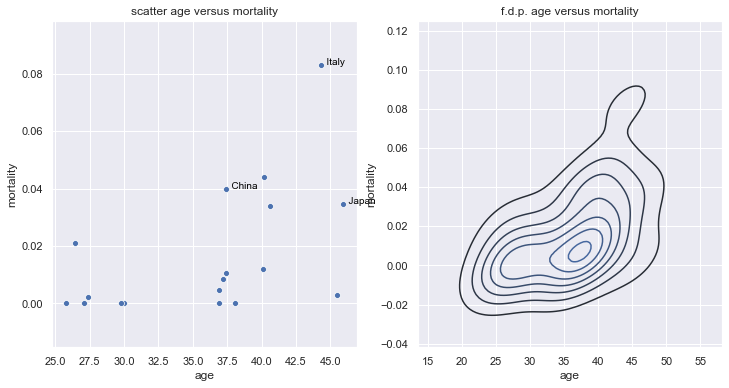

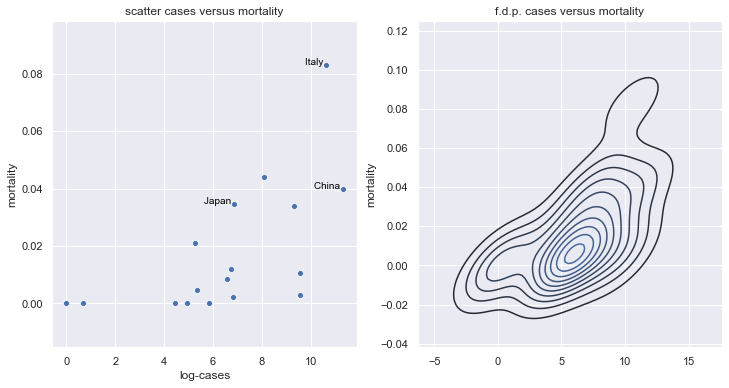

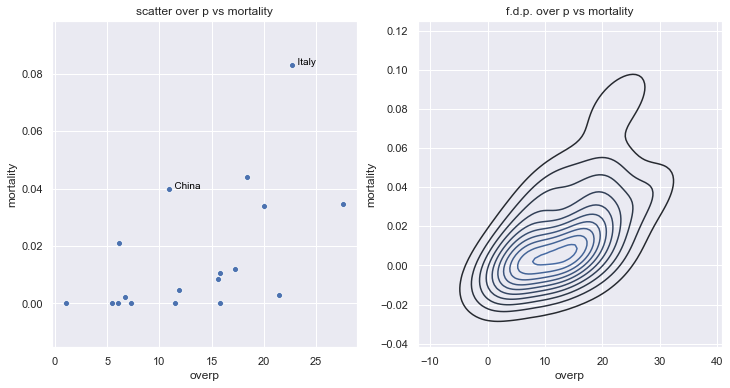

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

print('\n\nSituation in Chile\n'),
print("CASES:",data_cases['Chile'].values[-1])
print("DEATHS:",data_deaths['Chile'].values[-1])
print("AGE:",data_age.loc['Chile',' Age'])
print('\nLAST DATE:',data_cases['date'].values[-1],"(-1 DAY DELAY)"),
print('\n')

fig, ax = plt.subplots(figsize=(12,6),nrows=1, ncols=2)
sns.scatterplot('age','mortality',data=mortality_df,ax=ax[0])
sns.kdeplot(mortality_df.age,mortality_df.mortality,ax=ax[1]);
ax[0].set_title("scatter age versus mortality")
ax[1].set_title("f.d.p. age versus mortality")
print(mortality_df.loc['Italy','age'])
print(mortality_df.loc['Italy','mortality'])

ax[0].text(mortality_df.loc['Italy','age'],mortality_df.loc['Italy','mortality'], "  Italy", horizontalalignment='left', size='small', color='black')
ax[0].text(mortality_df.loc['China','age'],mortality_df.loc['China','mortality'], "  China", horizontalalignment='left', size='small', color='black')
ax[0].text(mortality_df.loc['Japan','age'],mortality_df.loc['Japan','mortality'], "  Japan", horizontalalignment='left', size='small', color='black')
#ax[0].text(mortality_df.loc['Spain','age'],mortality_df.loc['Spain','mortality'], "  Spain", horizontalalignment='left', size='small', color='black')

plt.show()

fig, ax = plt.subplots(figsize=(12,6),nrows=1, ncols=2)
sns.scatterplot('log-cases','mortality',data=mortality_df,ax=ax[0])
sns.kdeplot(mortality_df['log-cases'].values,mortality_df.mortality,ax=ax[1]);
ax[0].set_title("scatter cases versus mortality")
ax[1].set_title("f.d.p. cases versus mortality")

ax[0].text(mortality_df.loc['Italy','log-cases'],mortality_df.loc['Italy','mortality'], "Italy ", horizontalalignment='right',  verticalalignment='baseline', size='small', color='black')
ax[0].text(mortality_df.loc['China','log-cases'],mortality_df.loc['China','mortality'], "China ", horizontalalignment='right', size='small', color='black')
ax[0].text(mortality_df.loc['Japan','log-cases'],mortality_df.loc['Japan','mortality'], "Japan ", horizontalalignment='right', size='small', color='black')

plt.show()

fig, ax = plt.subplots(figsize=(12,6),nrows=1, ncols=2)
sns.scatterplot('overp','mortality',data=mortality_df,ax=ax[0])
sns.kdeplot(mortality_df.overp,mortality_df.mortality,ax=ax[1]);
ax[0].set_title("scatter over p vs mortality")
ax[1].set_title("f.d.p. over p vs mortality")

ax[0].text(mortality_df.loc['Italy','overp'],mortality_df.loc['Italy','mortality'], "  Italy", horizontalalignment='left', size='small', color='black')
ax[0].text(mortality_df.loc['China','overp'],mortality_df.loc['China','mortality'], "  China", horizontalalignment='left', size='small', color='black')

plt.show()

### **Actividades:**

1. Ajuste un modelo de regresión lineal que relacione la edad de la población con la tasa de mortalidad de la epidemia en un determinado país. Calcule e interprete un índice que refleje el grado de ajuste obtenido.  

2. Utilizando el resultado anterior, elabore un contraste que permita determinar si, a la luz de los datos disponibles, la edad de la población tiene un efecto sobre la tasa de mortalidad de la epidemia en ese lugar. Diseñe su contraste de manera tal que la probabilidad de declar incorrectamente que el efecto existe es menor al 5%. **Indique claramente cuáles son sus hipótesis nula y alternativa, así como las regiones de aceptación y rechazo de test**. Discuta la intepretación del resultado y (si lo desea) la metodología utilizada. 

4. Determine e p-valor asociado al contraste anterior.


## Respuesta 1

El modelo de regresión lineal que se utilizó para esta pregunta, tiene los siguientes parámetros:

\begin{align}
 \hat{y} = \hat{b}_0 + \hat{b}_1 * x
\end{align}  


Función redondeada:
y = -0.048 + 0.002 * x
b0 = -0.047504105405979276
b1 = 0.0017810700753486
Coeficiente de correlación = 0.5233012238370436


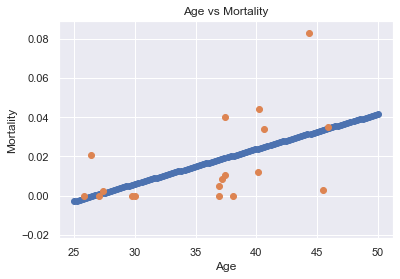

In [41]:
from scipy.stats import norm, t

n = int(mortality_df.size / 6)
#print(n)

x_prom = mortality_df['age'].mean()
y_prom = mortality_df['mortality'].mean()
Sxx = 0
Sxy = 0
Syy = 0

for i in range(0,n):
    x = mortality_df['age'][i] - x_prom
    y = mortality_df['mortality'][i] - y_prom
    Sxx += (x**2)
    Sxy += (x*y)
    Syy += (y**2)

b1 = Sxy/Sxx
b0 = y_prom - b1*x_prom
x = np.linspace(25,50,100)
y = b0 + b1*x
coef_corr = Sxy/(np.sqrt(Sxx) * np.sqrt(Syy))

print("Función redondeada:")
print("y =",round(b0,3),"+",round(b1,3),"* x")
print("b0 =",b0)
print("b1 =",b1)
print("Coeficiente de correlación =",coef_corr)

plt.title("Age vs Mortality")
plt.xlabel("Age")
plt.ylabel("Mortality")
plt.scatter(x,y)
plt.scatter(x = mortality_df['age'],y = mortality_df['mortality'])
plt.show()

El coeficiente de correlación refleja el grado de ajuste obtenido, esto significa que mientras más cercano al valor 1, los valores se comportan como una pendiente positiva, asimimsmo si el coeficiente se acercan al -1, estos se comportan como una pendiente negativa. También si su valor se acerca al 0, esto significa que no existe una relación lineal entre los valores, pero puede existir otro tipo de relación.  \
\
En el caso anterior el coeficiente es de 0.5, por lo que se puede deducir una pendiente positiva que no es muy visible a simple vista.

## Respuesta 2

Debido a que se necesita acotar la probabilidad de declarar incorrectamente que la edad de la población tiene un efecto sobre la mortalidad, entonces el error tipo 1 corresponde a que la edad de la población tiene un efecto sobre la tasa de mortalidad, cuando en realidad la edad no tiene un efecto sobre la mortalidad.  \
Por ello las hipótesis quedan asi:

*   $H_0$ : La edad de la población no tiene un efecto sobre la tasa de mortalidad
*   $H_1$ : La edad de la población tiene un efecto sobre la tasa de mortalidad



*   $H_0$ : $b_1 \leq 0$
*   $H_1$ : $b_1 > 0$

Siendo b1 la pendiente, ya que si la edad no tiene un efecto sobre la mortalidad, la pendiente será 0 o negativa (esto esta relacionado con el coeficiente de correlación previamente explicado).  \
Por ello usamos la fórmula para b1(pendiente) en una función:

\begin{align}
t = \frac{\hat{b}_1}{\hat{\sigma}\sqrt{S_{xx} }} \leq T_{\alpha,n-2}
\end{align}

In [27]:
def funciont(b1,sigma,Sxx):
    num = b1
    den = sigma*(np.sqrt(Sxx))
    return num/den

sse = Syy - (Sxy**2)/Sxx
sigma = np.sqrt(sse/(n-2))

t_std = t.ppf(0.05,df = n-2)

T = funciont(b1,sigma,Sxx)
print("T =",T)

rc_inf = -np.inf
rc_sup = t_std

print("Región de rechazo: (",rc_inf,",",rc_sup,"]")
print("Región de aceptación: (",rc_sup,", inf )")

print("Conclusión:")
if(rc_inf <= T and rc_sup > T):
    print("Se rechaza H0")
else:
    print("No se rechaza H0")
    

T = 0.003284359693583391
Región de rechazo: ( -inf , -1.7458836762762402 ]
Región de aceptación: ( -1.7458836762762402 , inf )
Conclusión:
No se rechaza H0


Como se puede observar, con una significación del 5% no se rechaza H0.

## Respuesta 3

In [28]:
p_value = t.pdf(T,df=n-2)
print("p_value: =",p_value)

p_value: = 0.3927589797170248


Con esto podemos concluir que T no podrá pertenecer a la región critica a menos que el nivel de significación sea de al menos 39%.

## Pregunta 3 (30%)

En esta actividad exploraremos la hipótesis del problema anterior usando una metodología alternativa. Separaremos los datos disponibles en dos sub-muestras: una correspondiente a los países con poblaciones más jóvenes y otra correspondiente a los países con poblaciones más ancianas. Su tarea será determinar si las estadísticas calculadas sobre cada muestra difieren lo suficiente como para sostener que a edad tiene un efecto sobre la tasa de mortalidad del virus.

El código que se presenta más abajo hace el trabajo de dividir el dataframe *mortality_df* en dos partes usando primero la edad y luego el % de la población por sobre los 65 años.



In [43]:
countries_old_by_age = mortality_df[mortality_df['age'] >= 38] #mayores a 38
countries_young_by_age = mortality_df[mortality_df['age'] < 38] #menores a 38

countries_old_by_over = mortality_df[mortality_df['overp'] > 18] #mayor a 18% (mayor a 65)
countries_young_by_over = mortality_df[mortality_df['overp'] <= 18] #menor a 18% (mayor a 65)

av_mortality_old_by_age = countries_old_by_age['mortality'].mean() #promedio de mortalidad de los mayores a 38 años
av_mortality_young_by_age = countries_young_by_age['mortality'].mean() #promedio de mortalidad de los menores a 38 años

av_mortality_old_by_over = countries_old_by_over['mortality'].mean() #promedio de mortalidad de los paises con más del 18%
av_mortality_young_by_over = countries_young_by_over['mortality'].mean() #promedio de mortalidad de los paises con menos del 18%


print("OLD: %.3f vs YOUNG: %.3f"%(av_mortality_old_by_age,av_mortality_young_by_age))
print("OLD: %.3f vs YOUNG: %.3f"%(av_mortality_old_by_over,av_mortality_young_by_over))

#mortalidad en los paiss donde sus ciudadanos son mayores de 38 es 3% y 0.8% en los menores de 38
#mortalidad en los paises donde más del 18% de los ciudadanos son 3era edad es del 4% y 0.8% donde son menores al 18%
print(mortality_df)


OLD: 0.030 vs YOUNG: 0.008
OLD: 0.040 vs YOUNG: 0.008
                      cases  log-cases deaths  mortality   age      overp
country                                                                  
Australia               709   6.563856      6   0.008463  37.2  15.656475
Barbados                  2   0.693147      0   0.000000  36.9  15.802694
Bhutan                    1   0.000000      0   0.000000  25.8   6.003012
Canada                  846   6.740519     10   0.011820  40.1  17.232007
China                 81337  11.306356   3254   0.040006  37.4  10.920884
Fiji                      1   0.000000      0   0.000000  27.1   5.449680
France                10995   9.305196    372   0.033834  40.6  20.034625
Germany               14138   9.556621     43   0.003041  45.5  21.461962
India                   191   5.252273      4   0.020942  26.4   6.179956
Italy                 41035  10.622181   3407   0.083027  44.3  22.751680
Japan                   950   6.856462     33   0.034737  

### **Actividades:**

1. Diseñe un contraste que permita decidir si la **mortalidad media** en los países con poblaciones jóvenes es menor que la **mortalidad media** en los países con poblaciones mayores. Incluya un país en el grupo de los países jóvenes si la edad media de su población es menor a 38 años. Diseñe su contraste de manera que la probabilidad de aceptar incorrectamente la hipótesis anterior es menor a $5\%$. **Indique claramente cuáles son sus hipótesis nula y alternativa, así como las regiones de aceptación y rechazo**.  Comente la decisión final.

2. Repita la actividad anterior incluyendo un país en el grupo de los países jóvenes si a lo más un 18% de su población supera los 65 años. Esta vez, calcule el $p$-valor corresspondiente al contraste y tome una decisión para $\alpha=0.05$. Comente la decisión final.

## Respuesta 1

Debido a que se necesita acotar la probabilidad de declarar incorrectamente que en los paises donde la población es menor a 38 años su mortalidad es menor a la del resto de los países, entonces el error tipo 1 corresponde a que la mortalidad es menor, cuando en realidad la mortalidad es mayor.
Por ello las hipótesis quedan asi:

*   $H_0$ : En los países donde la población es menor a 38 años, su mortalidad es mayor o igual a la de los paises donde su poblacion es mayor a 38 años
*   $H_1$ : En los países donde la población es menor a 38 años, su mortalidad es menor a la de los países con población mayor a 38 años


*   $H_0$ : $\mu_{menores} \geq \mu_{mayores}$
*   $H_1$ : $\mu_{menores} < \mu_{mayores}$

Por ello usamos la fórmula para dos medias con varianza diferentes y desconocidas:

\begin{align}
T = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}}} \leq t_{1-\alpha,\nu}
\end{align}

Donde sus grados de libertad son:

\begin{align}
\nu =\left \lfloor \frac{(S_1^2/n_1 + S^2_2/n_2)^2}{[(S_{1}^{2}/n_{1})^2/(n_{1} - 1)] + [(S_{2}^{2}/n_{2})^2/(n_{2} - 1)]} \right \rfloor
\end{align}

In [48]:
def funcionT(x1_prom,x2_prom,n1,n2,std_1,std_2):
    num = x2_prom - x1_prom
    den = np.sqrt((std_1**2)/n1 + (std_2**2)/n2)
    return num/den
    

def grados(n1,n2,std_1,std_2):
    num = ((std_1**2)/n1 + (std_2**2)/n2)**2
    den = (((std_1**2)/n1)**2)/(n1-1)+(((std_2**2)/n2)**2)/(n2-1)
    return num/den

n1 = countries_old_by_age.size / 6
n2 = countries_young_by_age.size / 6

x1_prom = av_mortality_old_by_age
x2_prom = av_mortality_young_by_age

std_1 = countries_old_by_age['mortality'].std()
std_2 = countries_young_by_age['mortality'].std()

v = int(grados(n1,n2,std_1,std_2))
t_std = t.ppf(0.05,df = v)
T = funcionT(x1_prom,x2_prom,n1,n2,std_1,std_2)
print("Valor de T:", T)

rc_inf = -np.inf
rc_sup = t_std
print("Región de rechazo: (",rc_inf,",",rc_sup,"]")
print("Región de aceptación: (",rc_sup,", inf )")

print("Conclusión:")
if(rc_inf <= T and rc_sup > T):
    print("Se rechaza H0")
else:
    print("No se rechaza H0")


Valor de T: -1.9195424735162752
Región de rechazo: ( -inf , -1.8945786050613054 ]
Región de aceptación: ( -1.8945786050613054 , inf )
Conclusión:
Se rechaza H0


Se puede observar que el valor estadístico entra dentro de la región de rechazo, por lo que se rechaza H0. Esto quiere decir que la mortalidad en personas mayores a 38 años es mayor que los menores.

## Respuesta 2

Debido a que se necesita acotar la probabilidad de declarar incorrectamente que en los paises donde máximo el 18% de la población tiene más de 65 años su mortalidad es menor al resto de los países, entonces el error tipo 1 corresponde a que la mortalidad es menor, cuando en realidad la mortalidad es mayor. Por ello las hipótesis quedan asi:

*tercera edad: mayores de 65 años

*   $H_0$ : En los países donde máximo un 18% de la población pertenece a la tercera edad, su mortalidad es mayor o igual a la de los paises donde su población de tercera edad supera el 18%
*   $H_1$ : En los países donde máximo un 18% de la población pertenece a la tercera edad, su mortalidad es menor a la de los países donde su población de tercera edad supera el 18%


*   $H_0$ : $\mu_{menores} \geq \mu_{mayores}$
*   $H_1$ : $\mu_{menores} < \mu_{mayores}$

Por ello usamos la fórmula para dos medias con varianza diferentes y desconocidas:

\begin{align}
T = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}}} \leq t_{1-\alpha,\nu}
\end{align}

Donde sus grados de libertad son:

\begin{align}
\nu =\left \lfloor \frac{(S_1^2/n_1 + S^2_2/n_2)^2}{[(S_{1}^{2}/n_{1})^2/(n_{1} - 1)] + [(S_{2}^{2}/n_{2})^2/(n_{2} - 1)]} \right \rfloor
\end{align}

In [52]:
n1 = countries_old_by_over.size / 6
n2 = countries_young_by_over.size / 6

x1_prom = av_mortality_old_by_over
x2_prom = av_mortality_young_by_over

std_1 = countries_old_by_over['mortality'].std()
std_2 = countries_young_by_over['mortality'].std()

v = int(grados(n1,n2,std_1,std_2))
t_std = t.ppf(0.05,df = v)
T = funcionT(x1_prom,x2_prom,n1,n2,std_1,std_2)
print("Valor de T:", T)
p_value = t.pdf(T,df=v)
print("p_value:",p_value)

rc_inf = -np.inf
rc_sup = t_std
print("Región de rechazo: (",rc_inf,",",rc_sup,"]")
print("Región de aceptación: (",rc_sup," inf )")

print("Conclusión:")
if(rc_inf <= T and rc_sup > T):
    print("Se rechaza H0")
else:
    print("No se rechaza H0")

Valor de T: -2.425503156469213
p_value: 0.0390797750411485
Región de rechazo: ( -inf , -2.1318467813362907 ]
Región de aceptación: ( -2.1318467813362907  inf )
Conclusión:
Se rechaza H0


Se puede observar que el valor estadístico pertenece a la región de rechazo, por lo que se rechaza la hipotesis H0. Esto también se puede confirmar al observar el p_value, el cual es más pequeño que alpha, por lo que H0 se rechaza al nivel alpha.